### The data set
The file with data ('titanic_data.csv') was actually downloaded from the udacity.com (Intro to Programming "Nano degree" course - what Nano (1e-9) means in the name of the course - who knows...). They call the file "curated". I have know idea what was re-organised in the data and why the dataset deserves to be called "curated" - for me it looks exactly the same as "train.csv" from Kaggle's toy competition "Titanic: Machine Learning from Disaster":
https://www.kaggle.com/c/titanic/data

To be consistent with Kaggle's huge Discussions, Kernels and Tutorials, I'll call the dataframe train. Eventually I'll cross-validate the data from 'titanic_data.csv' to see which algorithm(s) gives the most accurate prediction.

In [1]:
import numpy as np
import pandas as pd

# please do not forget to put the file with data ('titanic_data.csv') exactly in the same folder as this notebook
# or you'll have to change your path to data...
train = pd.read_csv('titanic_data.csv')

Let's have a brief glimplse of the data:

In [2]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Or you can look at the very end of the data set:

In [3]:
train.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


The most important ("target") variable is "Survived". It means "live" (if 1) or "die' (if 0). You can see the description of the other variables or factors at Kaggle: 
https://www.kaggle.com/c/titanic/data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


"Survived" is an integer. Several other variable are also numeric. Others are called "object" which stands for a string and represent categorical variables - different categories like S, M , L, XL for t-shirts.

If you are very-very attentive (or experienced) you'll notice that some data is missing. An easier way to see this is below:

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Very nice! I'll deal with the missing data later. Now I need to get the general feeling about the importance of different variables to answer the Question - the Big Question to be precise. But first, lets' finish off the introductory phase with a couple of useful commands:

In [6]:
train.dtypes # in fact, you get nothing new compared to train.info()

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
# an automatic method which spits out mean, sdt.deviation, median (called 50%, by the way), min and max for all numeric data

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# The BIG Question

The narrative about "Titanic" is pretty well-known. Hollywood exploited the topic too. Some people in Kaggle discussion mentioned a phrase from a movie "Women and children - first!" Was it True (boolean)? Or some other factors were more important. To put it in somewhat more formal way, let's investigate how different variables affected the probability of Survival ("Survived"). In the end, we'll reveal who had the highest chances of survival and learn that Hollywood, as almost always, produced some sweet fairy tale, the reality seemed to be more cynical and cruel.

### "Survived" vs other variables (Part 1)
You can call them features, by the way...(in data science)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns # a nice libaray which helps to produce beautiful graphics
%matplotlib inline

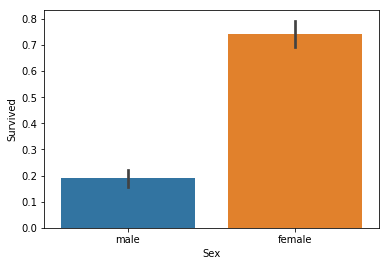

In [15]:
# Women first?

g = sns.barplot(x="Sex",y="Survived",data=train)

Probably True. Let's make a table with the same data:

In [11]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


The table looks less impressive, but it deals with exactly the same data and it is much more precise. What is more important, it helps me to formulate a reasonable (although extreemely simple) baseline model which I'll use to compare with other algorithms (the barplot is useless for this purpose, alas!)

### A primitive baseline model

OK, among 891 passengers 577 are men and 314 are women. How do I know this? Look here:

In [12]:
train.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

The most probably outcome for men - "die"(0), for women - "live" (1). The baseline model is to ascribe the most probable outcome for each man/ woman. This model is correct for 233 women and 468 men. The total accuracy is (233+468)/891 = 78.676%. Any 'data-scientific' model with accuracy lower than 79% is rubbish!

### "Survived" vs other variables (Part 2)

Now back to track! I'll draw a number of graphs to get the "general feeling" of what is important, unimportant and somwhere in the middle. In fact, I saw and liked(!!!) how seaborn is used for this purpose by https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling

So I'm not going to invent the bycicle I'll just borrow from the above Tutorial - thank you very much, Yassine (the author)! It's always a headache to choose the best graphic parameters. 

I must confess. Since I coded in FORTRAN IV I hate formatting the "print"-statement and other similar tasks, e.g.  positioning Boxes in CSS, writing incredibly long (and cryptic - for me) matplotlib commands. We live in the era of AI (artificial intelligence). Could some merciful demigod of AI create an app to tackle my most hated tasks?

However, if you want to choose the most difficult path, you can always do everything yourself. I'll just borrow (with the exact reference to the source, of course!) At the end of the day, my purpose is to find the best models for the dataset investigated.

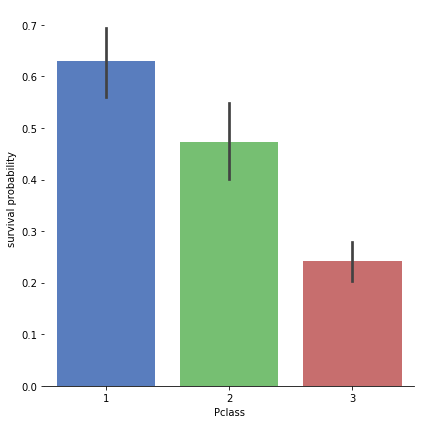

In [14]:
# Explore Pclass vs Survived
g = sns.factorplot(x="Pclass",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Interesting! Kaggle suggests using "Pclass" as a "proxy for socio-economic status (SES)" - 1st = Upper; 2nd = Middle; 3rd = Lower. https://www.kaggle.com/c/titanic/data

OK, it's not obvious that Pclass is the only proxy to identify the rich. Later I'll see that ticket price ("Fare") is also relevant. But the above plot show that the rich (fat cats) were treated very much differently than the other passengers even when the ship was drowning and the Cap (scoundrel! - old-fashioned) knew that the lifeboats were in short supply. Now the nasty truth starts to pop up. Let's see the table:

In [16]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Almost 63% of fat cats survived compared to just 24% of the poor...Hardly egalitarian!

Let's take a closer look:

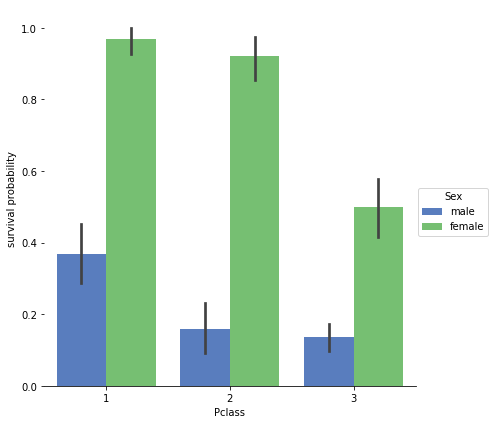

In [17]:
# Pclass&Sex vs Survived 
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

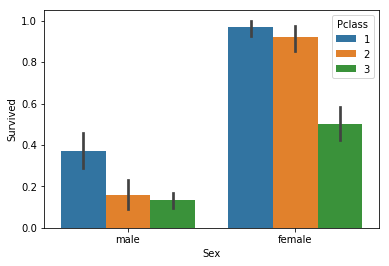

In [19]:
# I could also borrow from the seaborn tutorial:
#http://seaborn.pydata.org/tutorial/categorical.html

sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train)

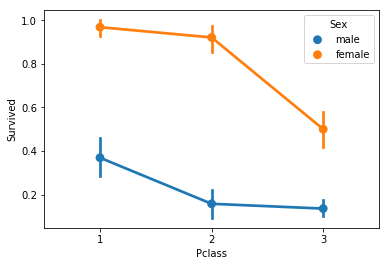

In [20]:
# Or use the pointplot from seaborn:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train)

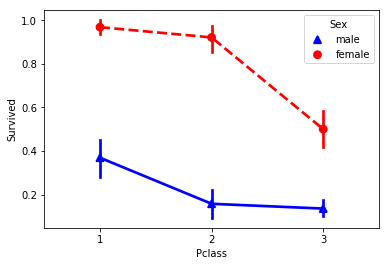

In [22]:
# You can even beautify your plot if you have nothing else to do:

sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train,
              palette={"male": "blue", "female": "red"},
              markers=["^", "o"], linestyles=["-", "--"])

OK, even the most beatiful plot can't hide the nasty truth. Well over 90% of women and almost 40% of men travelling 1st class survived. Probably the Cap immediately informed everyone in Class 1 cabins when the disaster stroke - long before all the others. Those who indulged their 1st class premises at that moment were extremely lucky (mostly women and their small children, in fact. The gentlemen probably entertained themselves elsewhere. Can I prove this hypothesis? Probably, yes. See train2 data frame below in which the "Age" variable is transformed into "Age groups", a categorical variable. Then you can draw similar plots or use similar tables to learn survival rate for men from different age group and different Classes. Do I want to learn this? Probably no - the truth may turn out even worse than what I discovered so far.

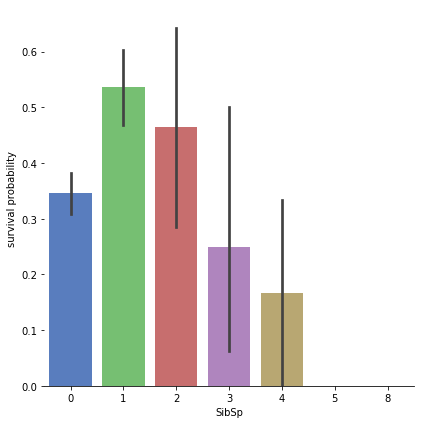

In [23]:
# Explore SibSp feature vs Survived
g = sns.factorplot(x="SibSp",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

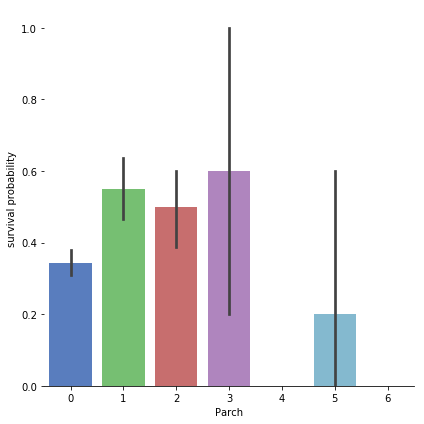

In [24]:
# Explore Parch feature vs Survived
g  = sns.factorplot(x="Parch",y="Survived",data=train,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009DD7EE49E8>]], dtype=object)

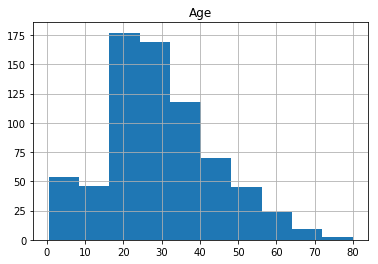

In [37]:
# children first? It relates to "Age", obviously. I feel a histogram might help. It is a very simple plot, in fact.
# But if I plot the simplest histogram it gives me nothing, of course, but the overall distribution independent of survival:
%pylab inline
train.hist("Age")

Instead, I must split the data into two data frames - one for those who survived, the other for those who didn't. Then build histograms at your pleasure...

In [26]:
trainLive = train[train["Survived"] == 1]
trainDie = train[train["Survived"] == 0]

In [27]:
# let's assert that we got the right split:
trainLive.describe()  # must be "Survived" == 1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [28]:
trainDie.describe()  # must be "Survived" == 0

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009DD74977F0>]], dtype=object)

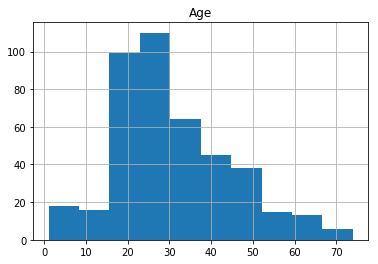

In [29]:
trainDie.hist("Age")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009DD7423A20>]], dtype=object)

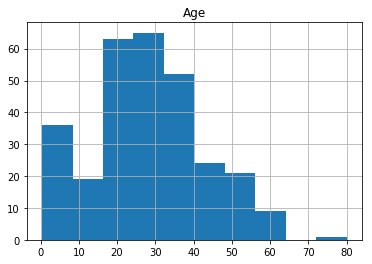

In [30]:
trainLive.hist("Age")

Very interesting! Of course, not perfect (a serial graphic maniac would use subplots to squeeze both plots into one image - I am not one of them!), but I can see some local maximum for children younger than 7 or 8 years. To improve 'resolution' I could play with "bin" parameter (default bin = 10) - number of bins. Instead. I'll borrow again seaborn histograms from Yassine's tutorial:

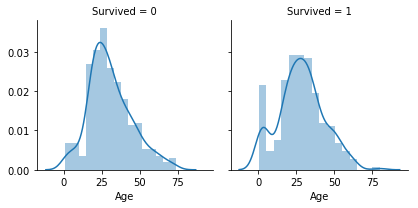

In [35]:
# https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

Now anyone can see a very clear local maximum in the right distribution represented by a line.

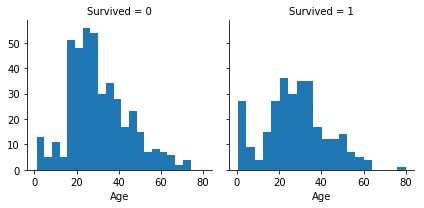

In [41]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20) # for higher resolution

Now let's turn to "Fare" - it seems to be an event better "proxy" for well-being of a person. If you can afford expensive tickets, you are rich, are you? just for fun, let's build a histogram:

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009DD752C978>]], dtype=object)

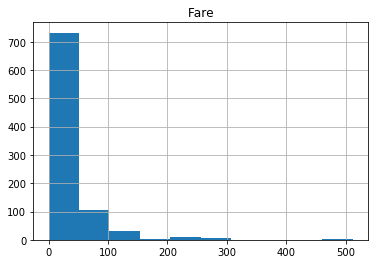

In [36]:
%pylab inline
train.hist("Fare")

Let's look at the outliers - the values which are located at very extreme positions:

In [38]:
train[train['Fare'] > 300] # Super rich?

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Who were those people and why they paid over 500 each? No idea...At least, we know that they all travelled in the 1st class and survived. In Kaggle's forum someone put forward a hypothesis that ridiculously high "Fare" was, in fact, a group ticket. These three person all have the same value of "Ticket" - probably it was a group ticket.

In [39]:
train[(train['Fare'] > 200) & (train['Fare'] <= 300)] # almost super rich?

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S


OK, now I see that the second-fattest cats were more numerous, but not so lucky - some of them drowned, although they all belonged to the prestigious Pclass == 1

Let's look at the opposite extreme of the "Fare" spectrum:

In [42]:
train[train['Fare'] < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


Something strange. All of them paid nothing. Why? They travelled in all three classes, by the way...OK, let's hope that intraicated "Big Data" algorithms would be able to extract something useful from "Fare". But to make life easier (for some of them) let's transoform this variable a bit using logarithm. You can't have log(0.0), Python will raise an Error, to avoid this I'll just add 1.0 to the "Fare" value:

In [43]:
# let's lof-transform Fare as promised. We add 1 to deal with those who didn't pay at all

train["Fare"] = np.log(train["Fare"] + 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009DD7D028D0>]], dtype=object)

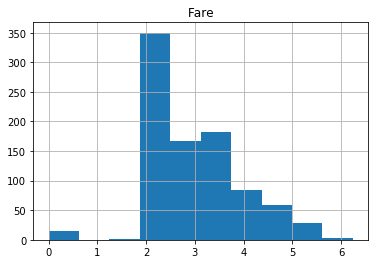

In [44]:
train.hist("Fare")

Perfect! Exactly what I wanted to achieve, now "Fare" lies in single digits. OK, probably enough for the preliminaries. Let's move to data science. Real life data science, I mean. With missing data.

## Missing values

It's always a headache. But I'll do my best.

Let's start from the obvious - "Embarked"

In [45]:
train[pd.isnull(train['Embarked']) == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.394449,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.394449,B28,NaN


Usual advice is fill in a categorical NA with the most probable category. We see from above that we are dealing with two pretty specific cases - women travelling in the same cabin from the 1st class, both survived.

In [46]:
len(train[(train["Sex"] == 'female') & (train["Pclass"] == 1) & (train["Embarked"] == "C")])

43

In [47]:
len(train[(train["Sex"] == 'female') & (train["Pclass"] == 1) & (train["Embarked"] == "Q")])

1

In [48]:
len(train[(train["Sex"] == 'female') & (train["Pclass"] == 1) & (train["Embarked"] == "S")])

48

The winner is "S"!

In [49]:
train.loc[[61, 829], "Embarked"] = "S" # This is called imputation

In [50]:
# Lets' assert the imputation:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Cabin seems the worst variable - 687 missing. My first reaction was to cast it away. We can hardly impute something reasonable. Then I thought - maybe it was a matter of procedure - rich got more attention while boarding and their cabin number was registered. It could be a "proxy" for passenger's well-being. Then I found this tutorial:

https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish

"Each Cabin starts with a letter. I bet this letter is much more important than the number that follows, let's slice it off."

In [51]:
def simplify_cabins(df):
    # no docstring or any other comment - I reproduce the function as it was in the above reference
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

In [52]:
train = simplify_cabins(train)

In [53]:
# Again, let's assert imputation:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

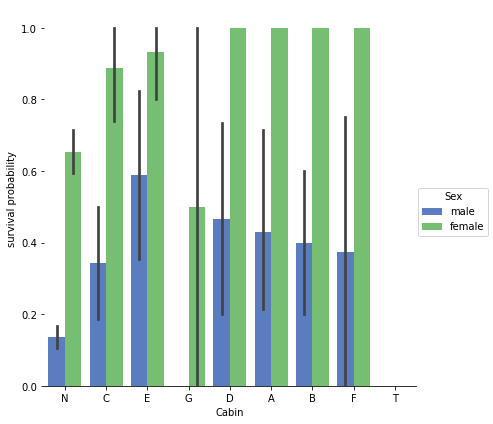

In [54]:
# Let's explore Cabin vs Survived by Sex
g = sns.factorplot(x="Cabin", y="Survived", hue="Sex", data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Great! My assumption is confirmed: Cabins starting with N (unknown) have significantly lower survival rate. Other letters seem to matter as well!

### Missing values -2. What to do with "Age"?

There are no simple ways to tackle the problem.
One option is dropna - the worst possible choice. We'll loose a lot of data, and even worse: unless we have a reasonbale imputation procedure we'll be unable to deal with all data from the test set.

Another option is definitely better : to fill the NA data with their mean (or median) values, a variation - split the data in subcategories (depending on class - 1st class passengers are generally older, sex etc) and fill NAs in each subcategory with the corresponding mean (median) values.

This approach works, but it has one nasty feature - the distribution gets an unnatural peak in the middle.

I would use a slightly better option - I am going to replace the missing "Age" data with normal random values with the same meand and variance (std. deviation).

Important! You can impute "Age" in the test set using exactly the same procedure used for the train set. Here arises a problem for which I know no satisfactory answer. About cross-validation. If I use validation set as a mock test set, how to combine the ban to use test data for imputation in test set with k-fold cross-validation? If I split the train set into ten folds, I train 10 models with all "observations" (rows in train data frame) used as test data in one of the ten models. How to resolve the issue? 

A third option is to use "age groups". Let me again quote from this tutorial:
https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish

"Aside from 'Sex', the 'Age' feature is second in importance. To avoid overfitting, I'm grouping people into logical human age groups."

In [56]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 90)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

As I am going to play both games with "Age", let's create two copies of out data set.

In [57]:
train1 = train.copy(deep=True)
train2 = train.copy(deep=True)

In [58]:
# Assert!
train1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.639057,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.433987,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3.196630,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.433987,C,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,2.169054,N,Q


In [59]:
# Again assert!
train2.tail() #should be exactly the same as above

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.639057,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.433987,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3.196630,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.433987,C,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,2.169054,N,Q


In [60]:
train2 = simplify_ages(train2)

In [61]:
train2.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,Young Adult,0,0,211536,2.639057,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,Student,0,0,112053,3.433987,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,Unknown,1,2,W./C. 6607,3.196630,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,Young Adult,0,0,111369,3.433987,C,C
890,891,0,3,"Dooley, Mr. Patrick",male,Young Adult,0,0,370376,2.169054,N,Q


In [64]:
train1["Age"] = (train1["Age"] - train1["Age"].mean())/(train1["Age"].std()) 
# normalization, it makes life easier for many algorithms

In [65]:
train1.describe() # See how "Age" changed

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,7.140000e+02,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,-7.463684e-18,0.523008,0.381594,2.962246
std,257.353842,0.486592,0.836071,1.000000e+00,1.102743,0.806057,0.969048
min,1.000000,0.000000,1.000000,-2.015566e+00,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,-6.590796e-01,0.000000,0.000000,2.187218
50%,446.000000,0.000000,3.000000,-1.169668e-01,0.000000,0.000000,2.737881
75%,668.500000,1.000000,3.000000,5.714304e-01,1.000000,0.000000,3.465736
max,891.000000,1.000000,3.000000,3.462699e+00,8.000000,6.000000,6.240917


Attention! Here we need a trick. 

Problem: If I use train1.fillna(np.random.normal(loc=0.0, scale=1.0)) , it'll call the random generator only once and fill all the missing values with this same value. This is definitely not what I want.

Solution: Instead, I'll first fill all missing "Age" data with some huge number (999999) and then replace it with a random variable - one by one.

In [66]:
def ageConv(a):
    # a is a numeric value or NaN - missing value, replaced by 999999.0
    # returns the same numeric value or generates a random normal value if a was missing the replaced
    if a == 999999.0:
        return np.random.normal(loc=0.0, scale=1.0)
    return a

In [69]:
np.random.seed(1024)
train1.fillna(999999, inplace = True)
train1.Age = train1.Age.apply(lambda x: ageConv(x))
train1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,-0.012350,0.523008,0.381594,2.962246
std,257.353842,0.486592,0.836071,1.001018,1.102743,0.806057,0.969048
min,1.000000,0.000000,1.000000,-2.723711,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,-0.667685,0.000000,0.000000,2.187218
50%,446.000000,0.000000,3.000000,-0.116967,0.000000,0.000000,2.737881
75%,668.500000,1.000000,3.000000,0.629614,1.000000,0.000000,3.465736
max,891.000000,1.000000,3.000000,3.462699,8.000000,6.000000,6.240917


##### Children First?

Now train2 data frame allows me to investigate survival rate for various Age groups. But here the story gets cruel - sorry about this.

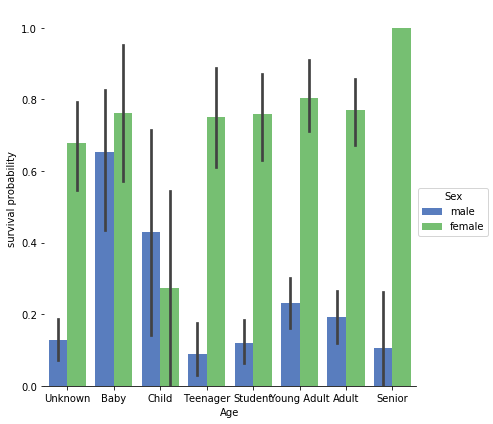

In [70]:
# Age (group) vs Survived by Sex
g = sns.factorplot(x="Age", y="Survived", hue="Sex", data=train2,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

What one can see here? Girls generally survived independent of there age, probably they were close to their Moms who were saved, it was a priority. There was a comparably high survival rate for baby-boys (younger than 5 y.o.) Older boys' survivale rate is lower, extremely low for Teenagers (12-17 y.o.) - no one cared about them. Of course, young adults shoud be more useful in life boats in case of some second emergency. But the cruel truth is that only boys who stayed with their mothers had a good chance of survival. 

Again. "Women and children - first!" Was it True? No, it was False. First, the fat cats were rescued. Women were second. Boys could survive mostly if they gripped their Moms.